# Big Mart Sales Prediction 

## Problem Statement

BigMart's Data Science team has gathered sales data from 2013, covering 1,559 products across 10 stores located in various cities. Along with sales figures, they have also recorded specific attributes related to each product and store. The primary objective of this data science project is to develop a predictive model that accurately forecasts the sales of individual products at specific stores.

**Business Objective:**  
By leveraging this model, BigMart aims to identify key product and store attributes that significantly influence sales performance, enabling strategic decisions to boost overall sales.

**Analysis Overview:**  
- **Type of Problem:** Supervised Learning  
- **Target Variable:** `Item_Outlet_Sales`

## Loading Packages and Data

In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.style as style
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display  
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
file_path = "/Users/nav/Documents/Data/BigMartSalesPredictionDatasets/train.csv"
file_path1 = "/Users/nav/Documents/Data/BigMartSalesPredictionDatasets/test.csv"

## Data Structure and Content

### Train dataset 

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
df.duplicated().any()

np.False_

We observe the following missing values in our Train dataset:  
- **Outlet_Size** (categorical feature) has **2,410** missing values.  
- **Item_Weight** (numerical feature) has **1,463** missing values.

### Test dataset

In [11]:
test_df = pd.read_csv(file_path1)

In [12]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We observe the following missing values in our Test dataset:  
- **Outlet_Size** (categorical feature) has **1,606** missing values.  
- **Item_Weight** (numerical feature) has **976** missing values.

In [14]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

The "Outlet_Identifier" feature is crucial for modeling, as it consists of only ten (10) unique values, each corresponding to one of the ten (10) stores where the data was collected.

### Exploratory Data Analysis

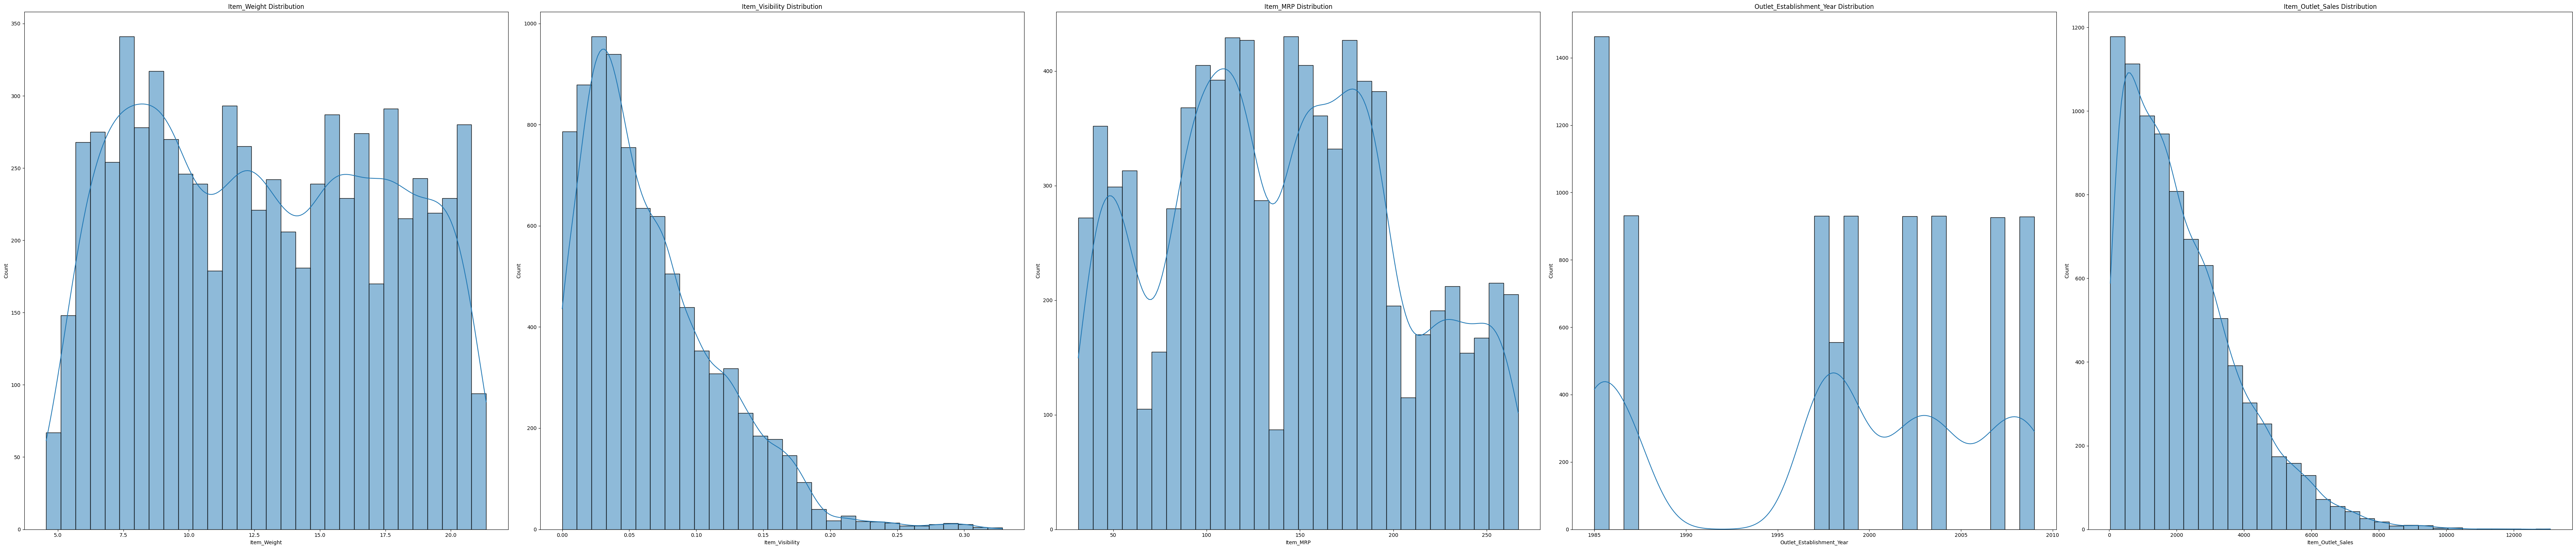

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(70, 15))
sns.histplot(df["Item_Weight"], bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{"Item_Weight"} Distribution')
sns.histplot(df["Item_Visibility"], bins=30, kde=True, ax=axes[1])
axes[1].set_title(f'{"Item_Visibility"} Distribution')
sns.histplot(df["Item_MRP"], bins=30, kde=True, ax=axes[2])
axes[2].set_title(f'{"Item_MRP"} Distribution')
plt.tight_layout()  
sns.histplot(df["Outlet_Establishment_Year"], bins=30, kde=True, ax=axes[3])
axes[3].set_title(f'{"Outlet_Establishment_Year"} Distribution')
plt.tight_layout()  
sns.histplot(df["Item_Outlet_Sales"], bins=30, kde=True, ax=axes[4])
axes[4].set_title(f'{"Item_Outlet_Sales"} Distribution')
plt.tight_layout() 
plt.show()

### Observations:  

- **Item_Weight** ranges between **5 Kg and 20 Kg**.  
- **Item_Visibility** is **right-skewed**.  
- Most products fall within the **₹100 – ₹180** price range in the **Item_MRP** feature.  
- A significant number of stores were established in **1985 and 1998**, with **no store openings between 1990 and 1995**.  
- **Item_Outlet_Sales** is **right-skewed**

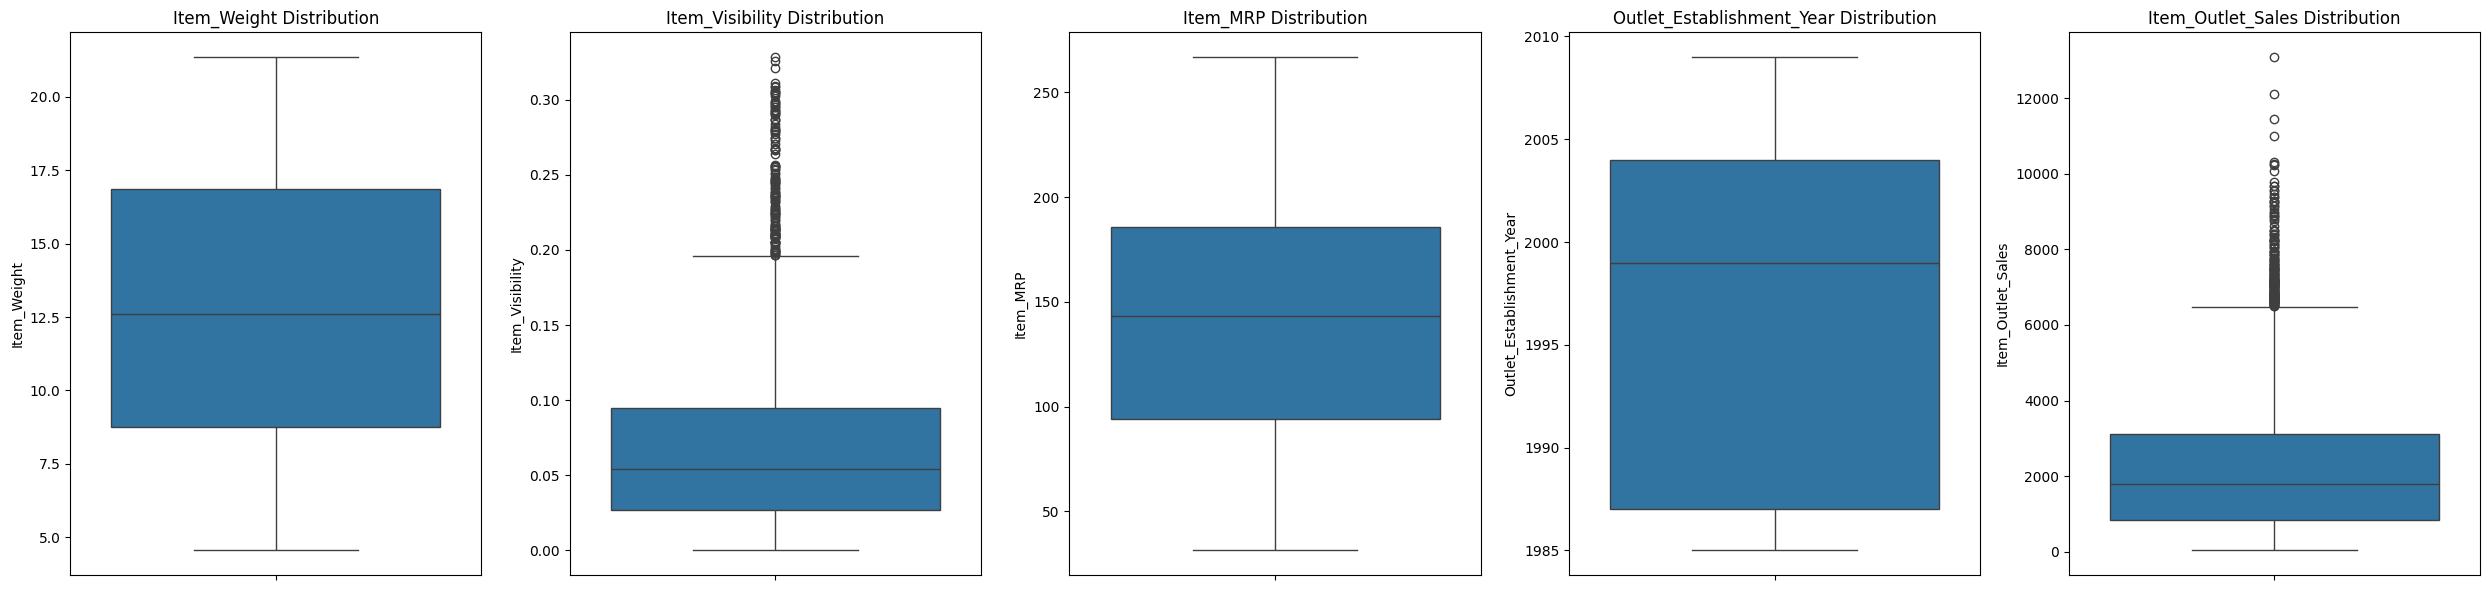

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(25, 6)) 
sns.boxplot(y=df["Item_Weight"], ax=axes[0])  
axes[0].set_title("Item_Weight Distribution")
sns.boxplot(y=df["Item_Visibility"], ax=axes[1])
axes[1].set_title("Item_Visibility Distribution")
sns.boxplot(y=df["Item_MRP"], ax=axes[2])
axes[2].set_title("Item_MRP Distribution")
sns.boxplot(y=df["Outlet_Establishment_Year"], ax=axes[3])
axes[3].set_title("Outlet_Establishment_Year Distribution")
sns.boxplot(y=df["Item_Outlet_Sales"], ax=axes[4])
axes[4].set_title("Item_Outlet_Sales Distribution")
plt.tight_layout()  
plt.show()



- **Item_Weight, Item_MRP, and Outlet_Establishment_Year** show **minimal or no outliers**.  
- **Item_Visibility and Item_Outlet_Sales** contain **outliers that may need removal**.  


In [17]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [18]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [19]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [20]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [21]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

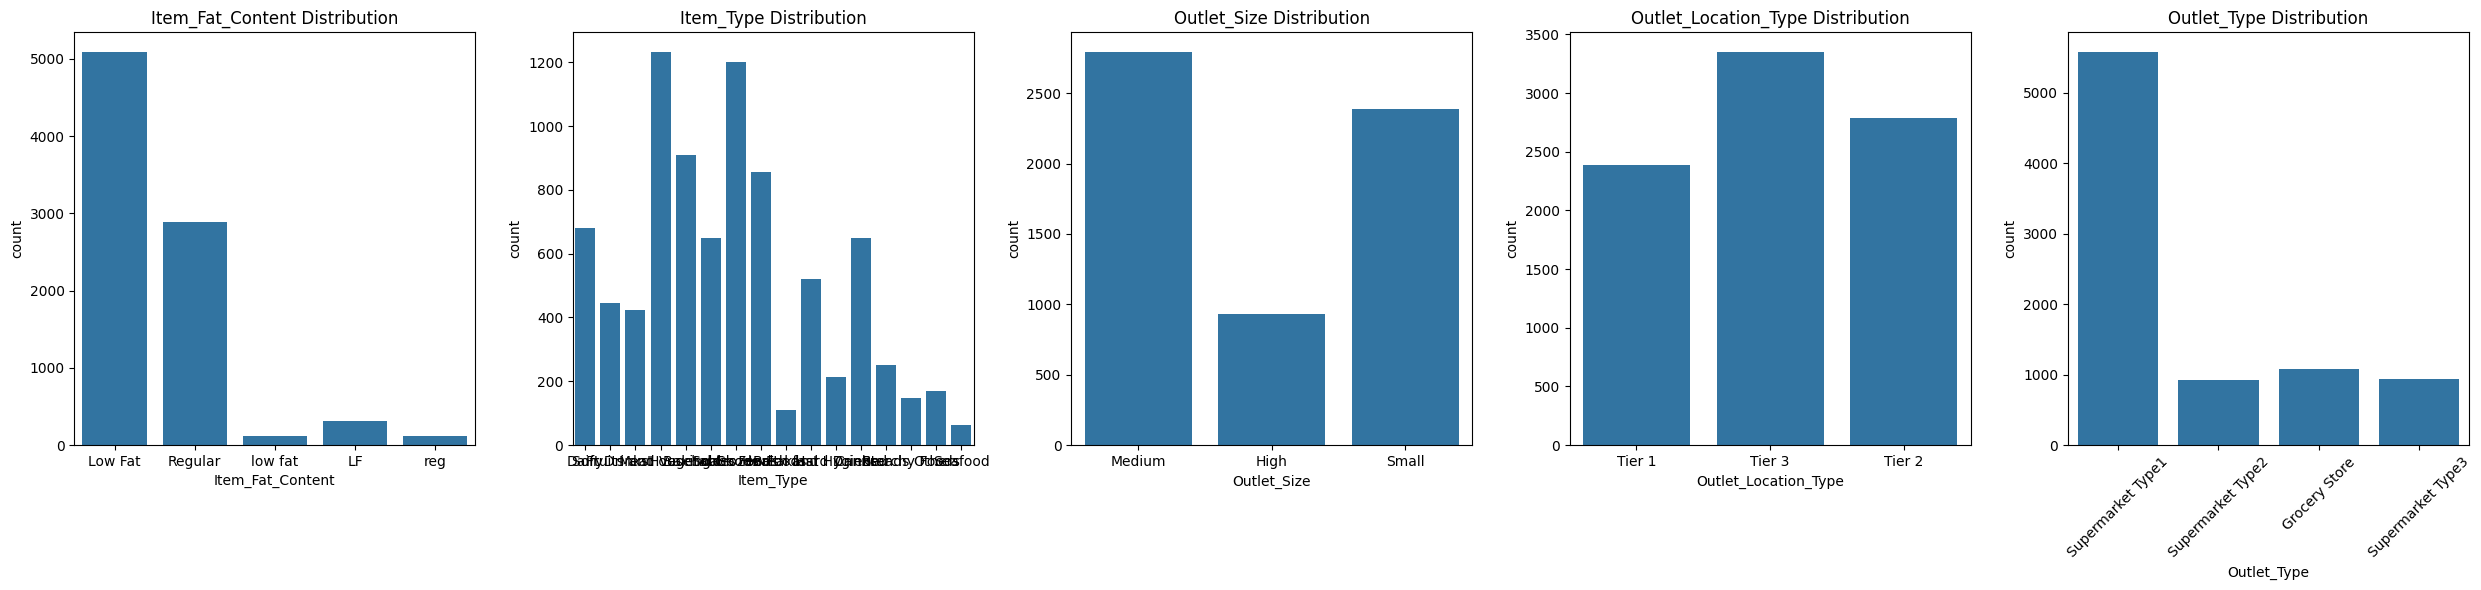

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(25, 6))  

sns.countplot(x=df["Item_Fat_Content"], ax=axes[0])  
axes[0].set_title("Item_Fat_Content Distribution")

sns.countplot(x=df["Item_Type"], ax=axes[1])
axes[1].set_title("Item_Type Distribution")

sns.countplot(x=df["Outlet_Size"], ax=axes[2])
axes[2].set_title("Outlet_Size Distribution")

sns.countplot(x=df["Outlet_Location_Type"], ax=axes[3])
axes[3].set_title("Outlet_Location_Type Distribution")

sns.countplot(x=df["Outlet_Type"], ax=axes[4])
axes[4].set_title("Outlet_Type Distribution")

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()




- The **Item_Fat_Content** column needs **cleaning** due to inconsistencies:  
  - `'Low Fat'`, `'low fat'`, and `'LF'` should be grouped into a **single category**.  
  - `'Regular'` and `'reg'` should also be **merged**.  
  - Additionally, the **'Low Fat' category has more items** than 'Regular'.  

- The **Item_Type** feature has **16 different categories**, which might be **too many**.  
  - We could consider **grouping similar categories** during feature engineering, for example:  
    - **'Soft Drinks'** and **'Hard Drinks'** → **'Drinks'** category.  
    - **'Snack Foods', 'Frozen Foods', 'Starchy Foods', and 'Seafood'** → **'Foods'** category.

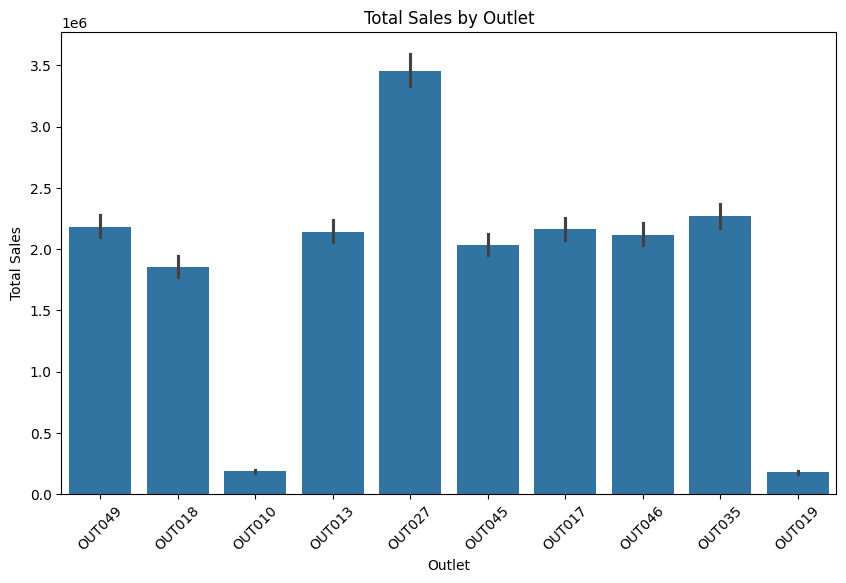

In [23]:


# Setting up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Bar plot for total sales by Outlet Type
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, ax=axes, estimator=sum)
axes.set_title("Total Sales by Outlet")
axes.set_xlabel("Outlet")
axes.set_ylabel("Total Sales")
axes.tick_params(axis='x', rotation=45)

# Display the plot
plt.show()


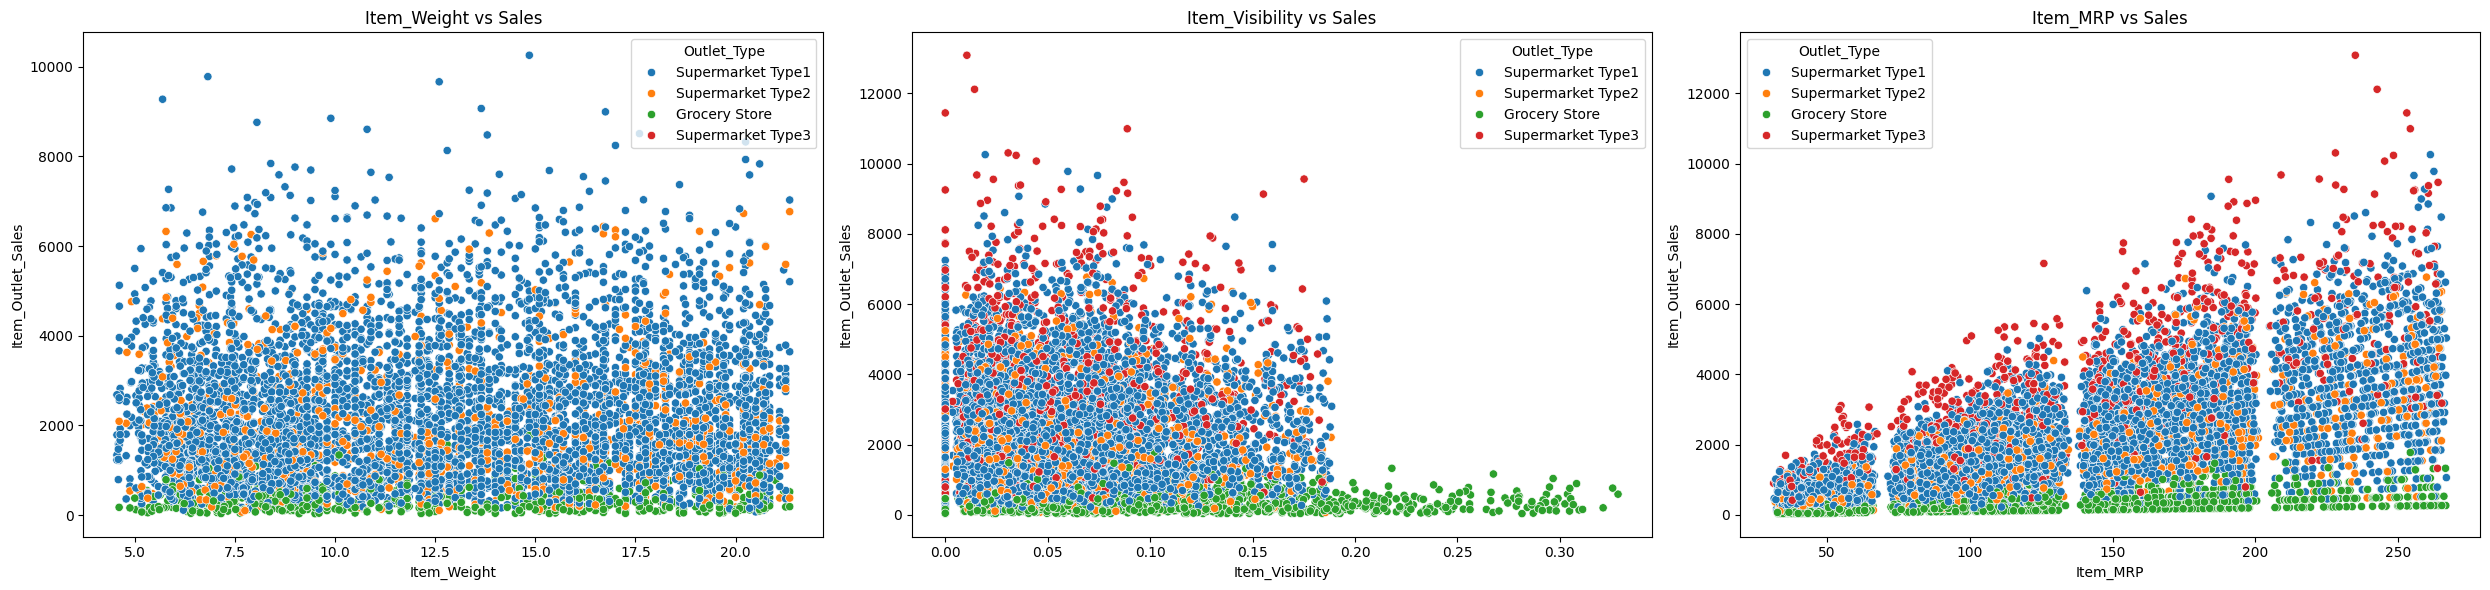

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  
sns.scatterplot(x=df["Item_Weight"], y=df["Item_Outlet_Sales"], hue=df["Outlet_Type"], ax=axes[0])  
axes[0].set_title("Item_Weight vs Sales")
sns.scatterplot(x=df["Item_Visibility"], y=df["Item_Outlet_Sales"], hue=df["Outlet_Type"], ax=axes[1])
axes[1].set_title("Item_Visibility vs Sales")
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], hue=df["Outlet_Type"], ax=axes[2])
axes[2].set_title("Item_MRP vs Sales")
plt.tight_layout()  
plt.show()


## Missing values tratement 


In [25]:
mean_weight = df["Item_Weight"].mean()
median_weight = df["Item_Weight"].median()
print(mean_weight,median_weight)

12.857645184135976 12.6


In [26]:
df["Item_Weight_Mean"] = df['Item_Weight'].fillna(mean_weight)
df["Item_Weight_Median"] = df['Item_Weight'].fillna(median_weight)

In [27]:
print("Original Weight Variable Variance :", df["Item_Weight"].var())
print("Item Weight Variance after Mean Imputation :", df["Item_Weight_Mean"].var())
print("Item Weight Variance after Median Imputation", df["Item_Weight_Median"].var())

Original Weight Variable Variance : 21.561688259836558
Item Weight Variance after Mean Imputation : 17.86012173506058
Item Weight Variance after Median Imputation 17.869561454073647


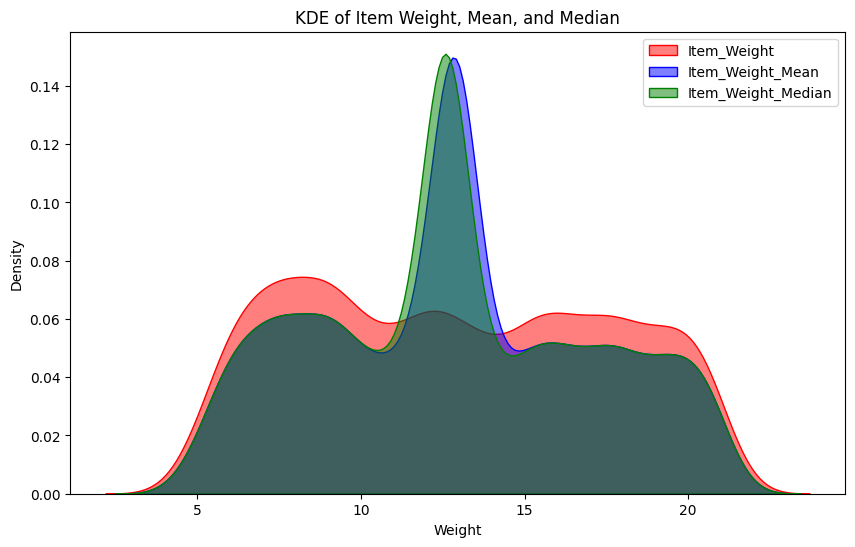

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Item_Weight'], label='Item_Weight', color='red', fill=True, alpha=0.5)
sns.kdeplot(df['Item_Weight_Mean'], label='Item_Weight_Mean', color='blue', fill=True, alpha=0.5)
sns.kdeplot(df['Item_Weight_Median'], label='Item_Weight_Median', color='green', fill=True, alpha=0.5)
plt.title('KDE of Item Weight, Mean, and Median')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()

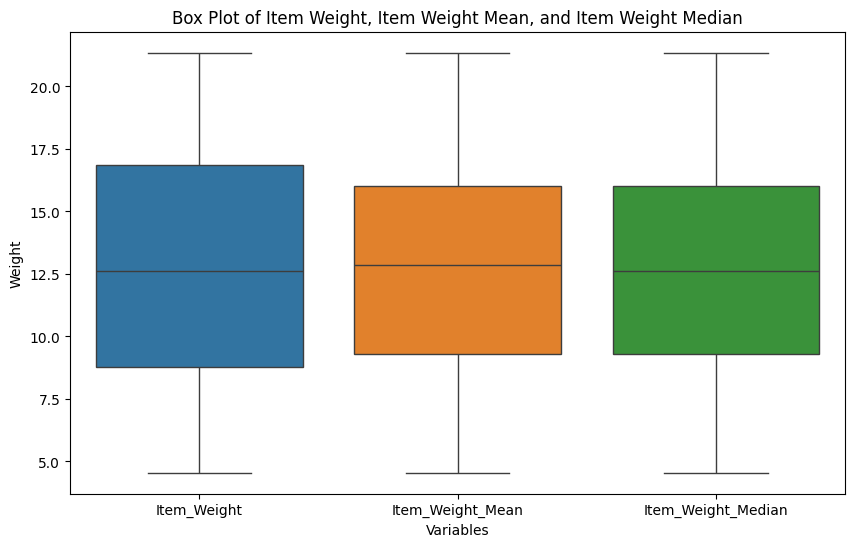

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Item_Weight", "Item_Weight_Mean", "Item_Weight_Median"]])
plt.title('Box Plot of Item Weight, Item Weight Mean, and Item Weight Median')
plt.xlabel('Variables')
plt.ylabel('Weight')
plt.show()

In [30]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

## Observation from Imputation Process
- **Mean and Median Values**  
  - Mean of `Item_Weight`: **12.8576**  
  - Median of `Item_Weight`: **12.6**  

- **Variance Analysis**  
  - Original Variance: **21.56**  
  - Variance after Mean Imputation: **17.86**  
  - Variance after Median Imputation: **17.87** (slightly higher than mean imputation but still lower than the original variance)

- **KDE (Kernel Density Estimation) Plot Observations**  
  - Both mean and median imputations caused a minor shift in the distribution, but the overall shape remained consistent.

- **Box Plot Observations**  
  - Similar distributions were observed across the original, mean, and median-imputed variables.

- **Final Decision**  
  - Given the closer alignment of the mean-imputed values with the original distribution and better variance retention, **mean imputation** was chosen for handling missing values.

In [31]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [32]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [33]:
mode_store = df.pivot_table(values = "Outlet_Size" , columns = "Outlet_Type" , aggfunc = (lambda x:x.mode()[0]))

In [34]:
mode_store

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [35]:
df["Outlet_Size"].isnull().sum()

np.int64(2410)

In [36]:
missing_values = df["Outlet_Size"].isnull()

In [37]:
df.loc[missing_values, "Outlet_Size"] = df.loc[missing_values, "Outlet_Type"].apply(lambda x:mode_store[x])

In [38]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Mean             0
Item_Weight_Median           0
dtype: int64

### **Observations for Handling Missing Values in `Outlet_Size`**

- **Value Counts for `Outlet_Size`:**  
  - **Medium:** 2,793 occurrences  
  - **Small:** 2,388 occurrences  
  - **High:** 932 occurrences  

- **Value Counts for `Outlet_Type`:**  
  - **Supermarket Type1:** 5,577 occurrences  
  - **Grocery Store:** 1,083 occurrences  
  - **Supermarket Type3:** 935 occurrences  
  - **Supermarket Type2:** 928 occurrences  

- **Mode Analysis Using Pivot Table:**  
  - For **Grocery Store**, the most common `Outlet_Size` is **Small**.  
  - For **Supermarket Type1**, the most common `Outlet_Size` is **Small**.  
  - For **Supermarket Type2**, the most common `Outlet_Size` is **Medium**.  
  - For **Supermarket Type3**, the most common `Outlet_Size` is **Medium**.

- **Missing Value Analysis:**  
  - The total number of missing values in `Outlet_Size` is **2,410**.

- **Imputation Strategy:**  
  - The missing `Outlet_Size` values were filled using the corresponding `Outlet_Type`'s mode value. This ensures that the imputed size is consistent with the most common size for that outlet type.



In [39]:
# Assuming 'test_df' is your original test dataset
test_df_copy = test_df.copy()


In [40]:
test_df_copy["Item_Weight_Mean"] = test_df_copy['Item_Weight'].fillna(mean_weight)
test_df_copy["Item_Weight_Median"] = test_df_copy['Item_Weight'].fillna(median_weight)

In [41]:
print("Original Weight Variable Variance :", test_df_copy["Item_Weight"].var())
print("Item Weight Variance after Mean Imputation :", test_df_copy["Item_Weight_Mean"].var())
print("Item Weight Variance after Median Imputation", test_df_copy["Item_Weight_Median"].var())

Original Weight Variable Variance : 21.760812343231528
Item Weight Variance after Mean Imputation : 18.02536584017682
Item Weight Variance after Median Imputation 18.02293203710757


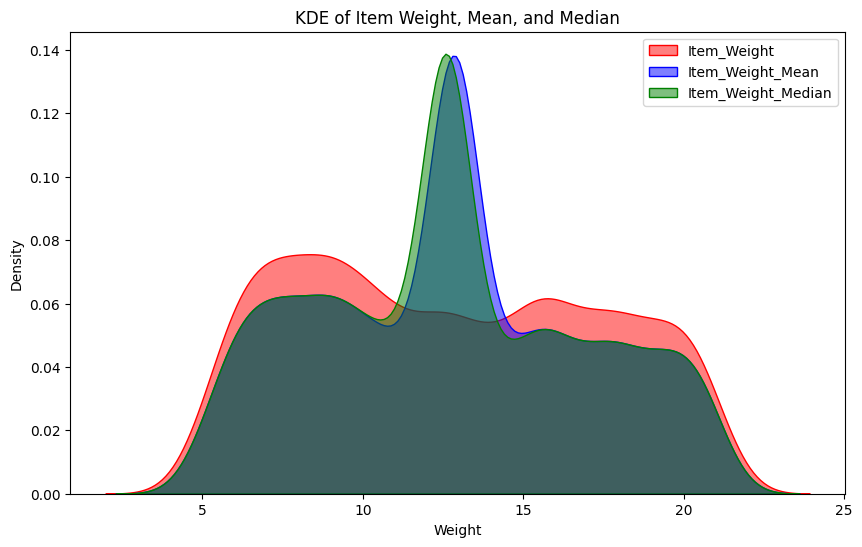

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(test_df_copy['Item_Weight'], label='Item_Weight', color='red', fill=True, alpha=0.5)
sns.kdeplot(test_df_copy['Item_Weight_Mean'], label='Item_Weight_Mean', color='blue', fill=True, alpha=0.5)
sns.kdeplot(test_df_copy['Item_Weight_Median'], label='Item_Weight_Median', color='green', fill=True, alpha=0.5)
plt.title('KDE of Item Weight, Mean, and Median')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()


In [43]:
test_df_copy["Item_Weight"] = test_df_copy["Item_Weight"].fillna(test_df_copy["Item_Weight"].mean())

In the test dataset, Variance analysis showed that after mean and median imputations, the variance slightly decreased but remained consistent with the original distribution. The KDE plots indicated minimal shifts, with the mean imputation aligning more closely to the original data. Given the better variance retention, mean imputation was chosen for handling missing values in the test data.

In [44]:
test_df_copy["Outlet_Size"].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [45]:
test_df_copy["Outlet_Size"].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [46]:
test_df_copy["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64

In [47]:
mode_store = test_df_copy.pivot_table(values = "Outlet_Size" , columns = "Outlet_Type" , aggfunc = (lambda x:x.mode()[0]))
missing_values = test_df_copy["Outlet_Size"].isnull()
test_df_copy.loc[missing_values, "Outlet_Size"] = test_df_copy.loc[missing_values, "Outlet_Type"].apply(lambda x:mode_store[x])

### **Observations for Handling Missing Values in `Outlet_Size` (Test Dataset)**

- **Value Counts for `Outlet_Size`:**  
  - **Medium:** 1,862 occurrences  
  - **Small:** 1,592 occurrences  
  - **High:** 621 occurrences  

- **Value Counts for `Outlet_Type`:**  
  - **Supermarket Type1:** 3,717 occurrences  
  - **Grocery Store:** 722 occurrences  
  - **Supermarket Type3:** 624 occurrences  
  - **Supermarket Type2:** 618 occurrences  

- **Mode Analysis Using Pivot Table:**  
  - For **Grocery Store**, the most common `Outlet_Size` is **Small**.  
  - For **Supermarket Type1**, the most common `Outlet_Size` is **Small**.  
  - For **Supermarket Type2**, the most common `Outlet_Size` is **Medium**.  
  - For **Supermarket Type3**, the most common `Outlet_Size` is **Medium**.

- **Missing Value Analysis:**  
  - Missing values in `Outlet_Size` were identified using `isnull()`.

- **Imputation Strategy:**  
  - Missing values in `Outlet_Size` were filled using the mode of the corresponding `Outlet_Type`. This ensures that the imputed values align logically with the most probable size for each outlet type.



In [48]:
test_df_copy.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_Mean             0
Item_Weight_Median           0
dtype: int64

#### Let's correct the errors in the Item_Fat_Content column

In [49]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [50]:
df.replace({"Item_Fat_Content" : {"low fat" : "Low Fat", "LF" : "Low Fat", "reg" : "Regular"}},inplace = True)

In [51]:
mean_weight_test_df = test_df["Item_Weight"].mean()
median_weight_test_df = test_df["Item_Weight"].median()
print(mean_weight_test_df,median_weight_test_df)

12.695633368756642 12.5


In [52]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [53]:
test_df_copy["Item_Fat_Content"].unique()
test_df_copy.replace({"Item_Fat_Content" : {"low fat" : "Low Fat", "LF" : "Low Fat", "reg" : "Regular"}},inplace = True)

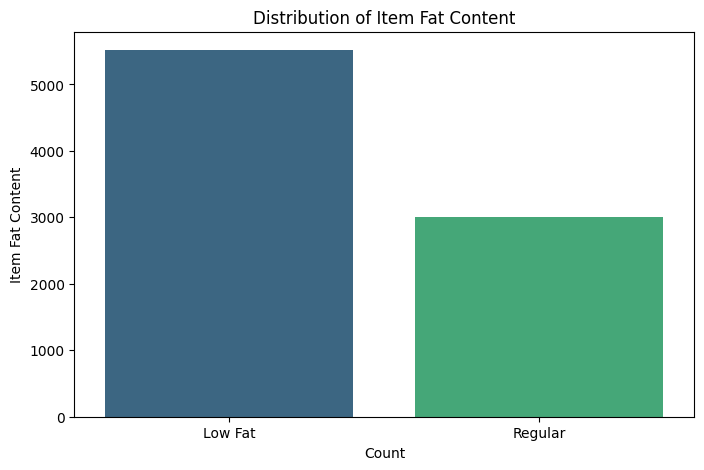

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Item_Fat_Content"], order=df["Item_Fat_Content"].value_counts().index, palette="viridis")
plt.title("Distribution of Item Fat Content")
plt.xlabel("Count")
plt.ylabel("Item Fat Content")
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='count'>

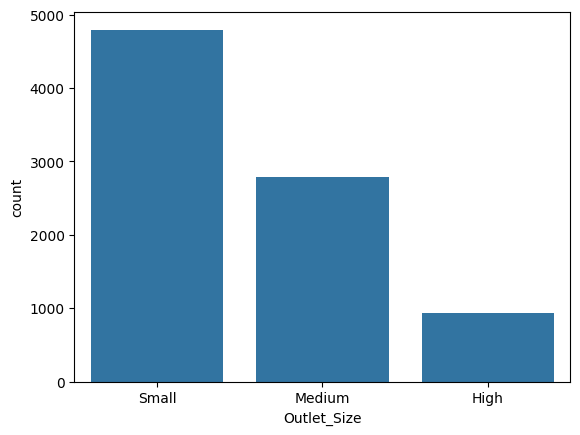

In [55]:
sns.countplot(x=df["Outlet_Size"], order=df["Outlet_Size"].value_counts().index)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

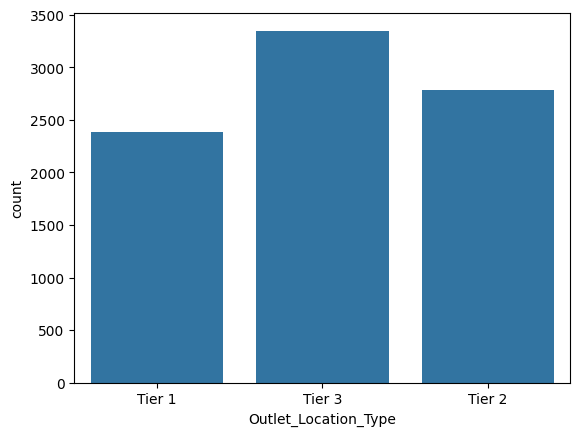

In [56]:
sns.countplot(x=df["Outlet_Location_Type"])

## Feature Engineering

In [57]:
df["Item_Category"] = df["Item_Identifier"].str[:2].map({"FD" : "Food", "DR" : "Drink", "NC" : "Non Consumables"})

The code generates a new column, `Item_Category`, by extracting the first two characters from the `Item_Identifier` column and mapping them to broader, more meaningful categories:  

- **"FD"** → **"Food"**  
- **"DR"** → **"Drink"**  
- **"NC"** → **"Non-Consumables"**  


<Axes: xlabel='Item_Category', ylabel='count'>

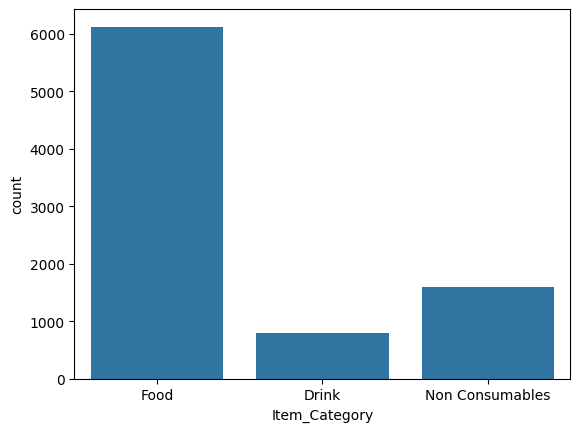

In [58]:
sns.countplot(x = df["Item_Category"])

In [59]:
# Encoding Categorical Variables
le = LabelEncoder()

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,19.20,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,Non Consumables


In [61]:
df.drop(["Item_Weight_Mean", "Item_Weight_Median"], axis=1, inplace = True)

In [62]:
#Label Encoder for Ordinate Data

df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])
df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = le.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])

# One-Hot Encoding for specific columns and convert to integers (1 and 0)
df = pd.get_dummies(df, columns=['Item_Type', 'Item_Category', 'Outlet_Identifier'], drop_first=True)

In [63]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Category_Food', 'Item_Category_Non Consumables',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')

In [64]:
# List of columns you want to convert to int (1 and 0)
columns_to_convert = [
    'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
    'Item_Type_Dairy', 'Item_Type_Frozen Foods',
    'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 
    'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
    'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
    'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
    'Item_Category_Food', 'Item_Category_Non Consumables',
    'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
    'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
    'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
    'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
    'Outlet_Identifier_OUT049'
]

# Convert these columns to int (1 and 0)
df[columns_to_convert] = df[columns_to_convert].astype(int)


In [65]:
pd.pandas.set_option('display.max_columns', None)

In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Category_Food,Item_Category_Non Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,249.8092,1999,1,0,1,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,48.2692,2009,1,2,2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,141.6180,1999,1,0,1,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,182.0950,1998,2,2,0,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,1987,0,2,1,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


## Preprocessing Data

In [67]:
## Splitting Train, Test data and drop useless columns 
x = df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
y=df['Item_Outlet_Sales']


In [68]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Category_Food,Item_Category_Non Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1999,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2009,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1999,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,1998,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [69]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Modeling

### Linear Regression

Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous dependent variable based on one or more independent variables. The model assumes a linear relationship between the input features and the target variable, aiming to find the best-fit line that minimizes the difference between actual and predicted values.

In [71]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predictions for LinearRegression on the test data
lin_reg_predictions = lin_reg_model.predict(X_test)

In [73]:
print('Training score  : {}'.format(lin_reg_model.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_model.score(X_test, y_test)))

Training score  : 0.5605281822892152
Test score      : 0.5751481437693314


In [74]:
# Evaluating
lin_reg_mse  = mean_squared_error(y_test , lin_reg_predictions)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = r2_score(y_test, lin_reg_predictions)

print('RMSE : {}'.format(lin_reg_rmse))
print('R2 Score : {}'.format(lin_reg_r2))

RMSE : 1114.9524768568076
R2 Score : 0.5751481437693314




The **LinearRegression** model above gives us a **training accuracy of about 56.1%** and a **test accuracy of about 57.5%**. We also get an **RMSE of about 1114.95** and an **R² score of 0.575**.  

Let's try to add some polynomial features to see how well Linear Regression performs. Additionally, we should **standardize our data** to scale it down to a range between 0 and 1. This helps when raising values to a power, ensuring we work with reasonable numbers.

🔹 **Training Score:** 0.5605  
🔹 **Test Score:** 0.5751  
🔹 **RMSE:** 1114.95  
🔹 **R² Score:** 0.5751  

- The training and test scores are **similar**, indicating that the model is **not overfitting**.  
- However, the **low R² score (~0.575)** suggests that only **57.5% of the variation** in the target variable is explained by the model.  
- The **high RMSE (1114.95)** suggests significant prediction error.  

**Conclusion:** Linear Regression appears to be **too simplistic** for this dataset and does not capture complex patterns effectively. Enhancing the model with **polynomial features** or trying more complex models could help improve performance.


Let's try to add some polynomial features to see how good the Linear Regression performs. However, something else we would like to do is standardize our data. This scales our data down to a range between 0 and 1. This serves the purpose of letting us work with reasonable numbers when we raise to a power.

In [75]:
steps = [('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)),('model',  LinearRegression())]
poly_reg_pipeline = Pipeline(steps)
poly_reg_pipeline.fit(X_train, y_train)
poly_predictions = poly_reg_pipeline.predict(X_test)
print('Training score  : {}'.format(poly_reg_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(poly_reg_pipeline.score(X_test, y_test)))

Training score  : 0.615278070446788
Test score      : 0.6176299135833037


In [76]:
#Evaluating performance
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = math.sqrt(poly_mse)  # Root Mean Squared Error
poly_r2 = r2_score(y_test, poly_predictions)  # R² Score

print('RMSE : {}'.format(poly_rmse))
print('R² Score : {}'.format(poly_r2))


RMSE : 1057.7415174614646
R² Score : 0.6176299135833037



The **Polynomial Regression** model achieved an improved **training score** of **0.6153**, and the **test score** is **0.6176**, indicating a **better generalization** than before. The model is learning patterns in the training data well and is performing more consistently on unseen data.

---

🔹 **Training Score:** 0.6153  
🔹 **Test Score:** 0.6176  
🔹 **RMSE:** 1057.74  
🔹 **R² Score:** 0.6176  

- **Polynomial Regression** extends Linear Regression by adding interaction and squared terms, allowing it to model **non-linear relationships**.  
- Improved test performance (**R² increased to ~0.62**), suggesting better model generalization.  
- The **training and test scores are quite similar**, indicating minimal overfitting.  
- However, the **high RMSE (1057.74)** still suggests room for improving prediction accuracy.

---

**Conclusion:**  
Polynomial Regression has shown better performance and generalization than previous models. However, to further reduce prediction error, applying **regularization techniques** like **Ridge or Lasso Regression** or exploring more **complex models**.


### **Regularized Linear Regression**  
#### **Ridge Regression (L2 Regularization)**  

Ridge Regression is a type of **regularized linear regression** that helps prevent **overfitting** by adding a **penalty term** to the loss function. This technique is particularly useful when dealing with **multicollinearity** or high-dimensional datasets.

During the training process using **gradient descent**, the model updates its weights by minimizing the loss function. Ridge Regression modifies this process by adding an **L2 penalty**, which is the sum of the squared coefficients. This penalty term discourages large coefficients, effectively shrinking them and leading to a simpler, more generalizable model.

In [77]:
steps = [('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)
print('Training Score  : {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, y_test)))

Training Score  : 0.6152768509464991
Test Score      : 0.617683942431572


In [78]:
# Predictions for Ridge on the test data
ridge_predictions = ridge_pipeline.predict(X_test)

In [79]:
# Evaluation
ridge_mse  = mean_squared_error(y_test , ridge_predictions)
ridge_rmse = math.sqrt(ridge_mse)
ridge_r2   = r2_score(y_test, ridge_predictions)

print('Ridge RMSE : {}'.format(ridge_rmse))
print('Ridge R2 Score : {}'.format(ridge_r2))

Ridge RMSE : 1057.666785445418
Ridge R2 Score : 0.617683942431572




The **Ridge Regression** model achieved a **training score** of **0.6153** and a **test score** of **0.6177**, indicating slightly better generalization compared to standard Polynomial Regression.

---

🔹 **Training Score:** 0.6153  
🔹 **Test Score:** 0.6177  
🔹 **RMSE:** 1057.67  
🔹 **R² Score:** 0.6177  

- **Ridge Regression** adds a penalty to large coefficients to **prevent overfitting**.  
- The **RMSE (1057.67)** is an improvement over the previous models, suggesting better prediction accuracy.  
- The model demonstrates **good generalization** with closely aligned training and test scores, indicating better stability.  
- Regularization with Ridge has effectively reduced the risk of overfitting.

---

**Conclusion:**  
Ridge Regression provides a **noticeable improvement** over standard Polynomial Regression by reducing overfitting and enhancing generalization.


### **Lasso Regression (L1 Regularization)**  

Lasso Regression is a type of **regularized linear regression** that helps in both **preventing overfitting** and **feature selection**. It achieves this by adding an **L1 penalty** to the loss function, which can shrink some feature coefficients to exactly **zero**, effectively eliminating less important features from the model.

When creating polynomial models, additional features are generated, but not all of them contribute significantly to the model's performance. Lasso Regression helps identify and retain only the most relevant features by penalizing the absolute values of the coefficients.

In [80]:
steps = [('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))]

lasso_pipeline = Pipeline(steps)
lasso_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(lasso_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(lasso_pipeline.score(X_test, y_test)))

Training score  : 0.6152483439726788
Test score      : 0.6181171716489288


In [81]:
# Predictions for Lasso on the testset
lasso_predictions = lasso_pipeline.predict(X_test)

In [82]:
# Evaluation
lasso_mse  = mean_squared_error(y_test , lasso_predictions)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2   = r2_score(y_test, lasso_predictions)

print('Lasso RMSE : {}'.format(lasso_rmse))
print('Lasso R2 Score : {}'.format(lasso_r2))


Lasso RMSE : 1057.0673572677174
Lasso R2 Score : 0.6181171716489288




The **Lasso Regression** model achieved a **training score** of **0.6152** and a **test score** of **0.6181**, indicating a slight improvement in generalization and prediction accuracy.

---

🔹 **Training Score:** 0.6152  
🔹 **Test Score:** 0.6181  
🔹 **RMSE:** 1057.07  
🔹 **R² Score:** 0.6181  

- The **RMSE (1057.07)** is slightly better than Ridge and Polynomial Regression, indicating an improvement in prediction accuracy.  
- The **training and test scores** are very close, suggesting **good generalization** and minimal overfitting.  
- The **R² score** of ~0.62 indicates that about **62% of the variability** in the target variable is explained by the model.  
- Compared to Ridge Regression, Lasso achieves a **slightly better balance** between accuracy and generalization.

---

**Conclusion:**  
Lasso Regression provides a **marginal improvement** over Polynomial and Ridge Regression by enhancing prediction accuracy and reducing overfitting. However, the overall enhancement is **minimal**, and further improvements could come from trying advanced models like **Gradient Boosting** or fine-tuning hyperparameters.


### **Random Forest**  

**Random Forest** is an advanced **ensemble learning algorithm** used for both **classification** and **regression** tasks. It operates by constructing a collection of **decision trees** during training and outputs the **average prediction** (for regression) or the **majority vote** (for classification) from all the trees.


In [83]:
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
# Predictions for XGBoost on the test data
rand_forest_predictions = rand_forest_model.predict(X_test)

In [85]:
print('Training score  : {}'.format(rand_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(rand_forest_model.score(X_test, y_test)))

Training score  : 0.9380316530067621
Test score      : 0.575176527340716


In [86]:
# Evaluation
rand_forest_mse = mean_squared_error(y_test , rand_forest_predictions)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_test, rand_forest_predictions)

print('RandomForest RMSE : {}'.format(rand_forest_rmse))
print('RandomForest R2 Score : {}'.format(rand_forest_r2))

RandomForest RMSE : 1114.9152322722198
RandomForest R2 Score : 0.575176527340716



The **Random Forest Regression** model achieved a **training score** of **0.9380** and a **test score** of **0.5752**, indicating strong performance on the training data but poor generalization to unseen data.

---

🔹 **Training Score:** 0.9380  
🔹 **Test Score:** 0.5752  
🔹 **RMSE:** 1114.92  
🔹 **R² Score:** 0.5752  

- **Random Forest Regression** is an ensemble model that reduces overfitting by averaging multiple decision trees.  
- The **high training score (0.9380)** shows that the model fits the training data **very well**, but the **drop in the test score (0.5752)** suggests **overfitting** and poor generalization.  
- The **RMSE (1114.92)** is **higher** than Lasso and Ridge Regression, indicating **worse prediction accuracy** on the test set.  
- The **R² score** (~0.58) shows that the model explains **only 57.5% of the variability** in the target variable, which is **lower** than Lasso but similar to the initial Linear Regression results.  
- The model is likely **too complex** for the current data and requires **hyperparameter tuning** to improve test performance.

---

**Conclusion:**  
While Random Forest shows **excellent performance on training data**, it suffers from **overfitting** and performs poorly on test data. It is **not recommended** without hyperparameter tuning to balance the model's complexity and improve generalization.


### **XGBoost (Extreme Gradient Boosting)**  

**XGBoost (Extreme Gradient Boosting)** is an advanced and efficient implementation of the gradient boosting algorithm, widely used for both classification and regression tasks. It builds models sequentially, where each new model corrects the errors of the previous one by focusing on difficult-to-predict data points. XGBoost incorporates **regularization techniques (L1 and L2)** to prevent overfitting and uses **gradient descent** to optimize the loss function. It is known for its high performance, speed, and ability to handle missing values automatically. 

In [87]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
#Final Predictions On The Test Dataset
xgb_predictions = xgb_model.predict(X_test)

In [89]:
print('XGBoost Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('XGBoost Test score      : {}'.format(xgb_model.score(X_test, y_test)))

XGBoost Training score  : 0.8627491469176756
XGBoost Test score      : 0.5459626844019696


In [90]:
# Evaluation
xgb_mse = mean_squared_error(y_test , xgb_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print('XGBoost RMSE : {}'.format(xgb_rmse))
print('XGBoost R2 Score : {}'.format(xgb_r2))

XGBoost RMSE : 1152.612619706531
XGBoost R2 Score : 0.5459626844019696




The **XGBoost Regression** model achieved a **training score** of **0.8627** and a **test score** of **0.5460**, indicating strong performance on the training data but poor generalization to unseen data.

---

🔹 **Training Score:** 0.8627  
🔹 **Test Score:** 0.5460  
🔹 **RMSE:** 1152.61  
🔹 **R² Score:** 0.5460  

- The **high training score (0.8627)** indicates that the model fits the training data well.  
- However, the **drop in test score (0.5460)** suggests that the model is **overfitting** and struggling to generalize to unseen data.  
- The **RMSE (1152.61)** is one of the highest among all models evaluated so far, indicating **less accurate predictions**.  
- The **R² score** (~0.55) shows that the model explains **only 55% of the variability** in the test dataset, which is **lower** compared to models like Ridge and Lasso.  

---

**Conclusion:**  
While XGBoost performs **well on the training set**, it suffers from **overfitting** and performs **poorly on the test data** with one of the highest RMSE scores. **Hyperparameter tuning** is essential to improve model generalization and reduce prediction errors.


### **LightGBM (Light Gradient Boosting Machine)**  

**LightGBM** is an advanced **gradient boosting framework** developed by Microsoft, designed for **high performance, speed, and efficiency**. It is widely used for **classification, regression, and ranking tasks** and is known for its ability to handle large datasets with lower memory consumption and faster training times compared to other boosting algorithms like XGBoost.


In [91]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
print("LGBM Training Score:", lgbm_model.score(X_train, y_train))
print("LGBM Test Score:", lgbm_model.score(X_test, y_test))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 34
[LightGBM] [Info] Start training from score 2182.637221
LGBM Training Score: 0.7209983333364376
LGBM Test Score: 0.5952876559547982


In [92]:
lgbm_predictions = lgbm_model.predict(X_test)

lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

print(f"RMSE: {lgbm_rmse}")
print(f"MAE: {lgbm_mae}")
print(f"R² Score: {lgbm_r2}")


RMSE: 1088.2052631534018
MAE: 759.6937551621509
R² Score: 0.5952876559547982



The **LightGBM Regression** model achieved a **training score** of **0.7210** and a **test score** of **0.5953**, indicating a decent fit but with some signs of overfitting.

---

🔹 **Training Score:** 0.7210  
🔹 **Test Score:** 0.5953  
🔹 **RMSE:** 1088.21  
🔹 **MAE:** 759.69  
🔹 **R² Score:** 0.5953  

- The **training score (0.7210)** indicates a strong fit to the training data, while the **test score (0.5953)** shows reasonable generalization, though the gap suggests some degree of **overfitting**.  
- The **RMSE (1088.21)** is better than XGBoost and Random Forest but slightly higher than Lasso and Ridge Regression.  
- The **MAE (759.69)** indicates that, on average, the predictions are off by around **760 units**, which is acceptable but could be improved.  
- The **R² score (~0.60)** suggests that **60% of the variability** in the test dataset is explained by the model, showing **decent but not optimal performance**.

---

**Conclusion:**  
LightGBM demonstrates **better generalization** than XGBoost and Random Forest, with an improved RMSE and MAE. However, the model still shows **signs of overfitting**, and further **hyperparameter tuning** may be needed to optimize performance.


In [93]:
 def evaluate_model(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return {
        "Model": model_name,
        "RMSE (Lower is Better)": round(rmse, 2),
        "MAE (Lower is Better)": round(mae, 2),
        "R² Score (Higher is Better)": round(r2, 4)
    }

results = [
    evaluate_model(lgbm_model, X_test, y_test, "LightGBM"),
    evaluate_model(ridge_pipeline, X_test, y_test, "Ridge Regression"),
    evaluate_model(lasso_pipeline, X_test, y_test, "Lasso Regression"),
    evaluate_model(rand_forest_model, X_test, y_test, "Random Forest"),
    evaluate_model(xgb_model, X_test, y_test, "XGBoost"),
]

results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE (Lower is Better),MAE (Lower is Better),R² Score (Higher is Better)
0,LightGBM,1088.21,759.69,0.5953
1,Ridge Regression,1057.67,751.25,0.6177
2,Lasso Regression,1057.07,750.56,0.6181
3,Random Forest,1114.92,783.35,0.5752
4,XGBoost,1152.61,810.72,0.5460


### **Best Model Recommendation: Lasso Regression**  

Based on the evaluation metrics provided, **Lasso Regression** is the **best-performing model** overall. Here's why:

---

### **Why Lasso Regression?**

1. **Lowest RMSE:**  
   - Lasso Regression has the **lowest RMSE (1057.07)**, indicating it has the **smallest average prediction error** among all models.

2. **Highest R² Score:**  
   - It achieves the **highest R² score (0.6181)**, meaning it explains **more variability** in the target data compared to other models.

3. **Simplicity and Interpretability:**  
   - Lasso performs **automatic feature selection** by shrinking less important feature coefficients to zero, making the model **simpler and more interpretable**.

4. **Stable and Consistent Performance:**  
   - While the performance difference between Lasso and Ridge is minimal, Lasso's feature selection makes it slightly better for generalization.

5. **Less Computational Cost:**  
   - Lasso requires **less hyperparameter tuning** and computational resources than complex ensemble models like LightGBM and XGBoost.


---

### **Conclusion:**  
- **Choose Lasso Regression** for its **best balance of accuracy, simplicity, and interpretability**.  
- It is a **robust and efficient** choice, especially when working with datasets that may contain irrelevant features.  
- This makes it ideal for ensuring **better generalization** without excessive computational overhead.


### **Formatting the Test Dataset to Match the Training Dataset for Model Execution**  


In [94]:
test_df_copy["Item_Category"] = test_df_copy["Item_Identifier"].str[:2].map({"FD" : "Food", "DR" : "Drink", "NC" : "Non Consumables"})


In [95]:
#Label Encoder for Ordinate Data

le = LabelEncoder()
test_df_copy["Item_Fat_Content"] = le.fit_transform(test_df_copy["Item_Fat_Content"])
test_df_copy["Outlet_Size"] = le.fit_transform(test_df_copy["Outlet_Size"])
test_df_copy["Outlet_Location_Type"] = le.fit_transform(test_df_copy["Outlet_Location_Type"])
test_df_copy["Outlet_Type"] = le.fit_transform(test_df_copy["Outlet_Type"])

# One-Hot Encoding for specific columns and convert to integers (1 and 0)
test_df_copy = pd.get_dummies(test_df_copy, columns=['Item_Type', 'Item_Category' , 'Outlet_Identifier'], drop_first=True)

In [96]:
# List of columns you want to convert to int (1 and 0)
columns_to_convert = [
    'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Category_Food', 'Item_Category_Non Consumables',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049']

# Convert these columns to int (1 and 0)
test_df_copy[columns_to_convert] = test_df_copy[columns_to_convert].astype(int)

In [97]:
test_df_copy.drop(["Item_Weight_Mean", "Item_Weight_Median"], axis=1, inplace = True)

In [98]:
test_df_copy.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

### **Running the Model and Generating Final Predictions**  

In [99]:
final_prediction =lasso_pipeline.predict(test_df_copy)

In [100]:
final_output = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
final_output['Item_Outlet_Sales'] = final_prediction
 
print(final_output.head())

final_output.to_csv('final_predictions.csv', index=False)


  Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1707.715162
1           FDW14            OUT017        1553.567404
2           NCN55            OUT010         682.755053
3           FDQ58            OUT017        2573.887399
4           FDY38            OUT027        6374.127621
